# Developing Containerized Applications on Google Cloud

## Expectations

My expectations are to have mainly a review of the concept of Containers, with perhaps some new information I have not learned before scattered in

I expect to learn the specific ways that the container life cycle is created and maintained through Google Cloud

## Insights

The section highlighting containers run in different languages actually serves as a fairly good cheatsheet on what they each need to run, and also shows details such as what languages can run immediately, versus ones that will need compiling, etc

Google's Cloud Run is the Equivalent of AWS Fargate

## General Containerization Concepts



**The Container**

The Container is a package of:
* Application Code
* Dependencies:
  * Programming language runtimes
  * Software Libraries

**The Container Image**

Represents a template that defines how a constainer instance will be realized at runtime

The image packages your application along with everything it needs to run

You can also consider a Container Image an Archive of Files

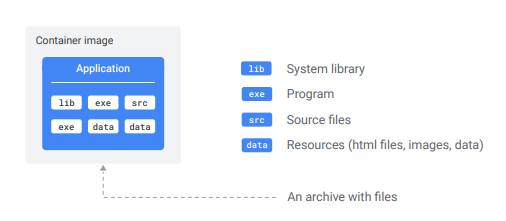

**Runtime Instance:**

When you run a container image, you execute one of the programs inside the image, for example for a Java Application, you execute the Java Virtual Machine

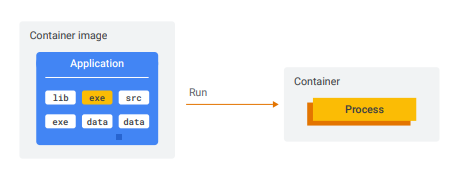

**File System and Network Stack:**

The container has a private file system that is seeded by the contents of the container image

The container has access to a virtual network interface, with a local IP, so your application can bind to this interface and start listening on a port for incoming traffic

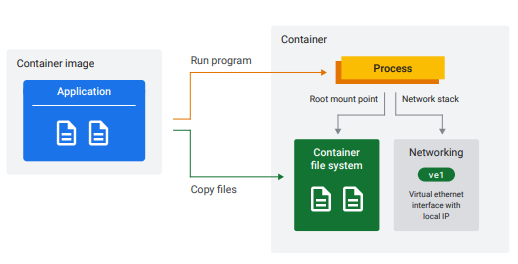

**A Simple Web Application to Explain Containers:**

Application has three files:

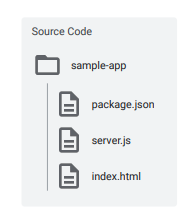

server.js file:

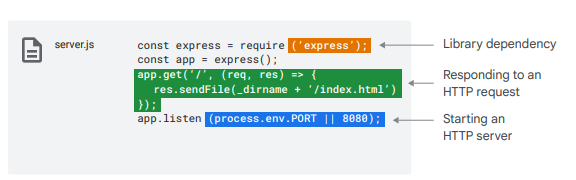

package.json file:

used by npm to install dependencies

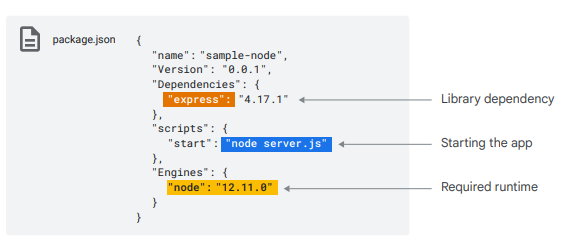

index.html file:

Simple "hello world" webpage:

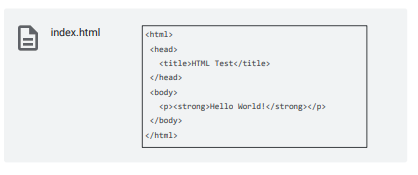

Node.js web application

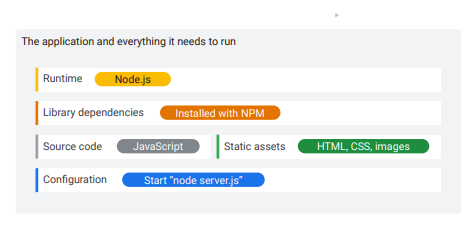

Python web application:

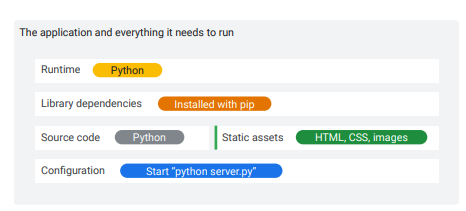

Java Application

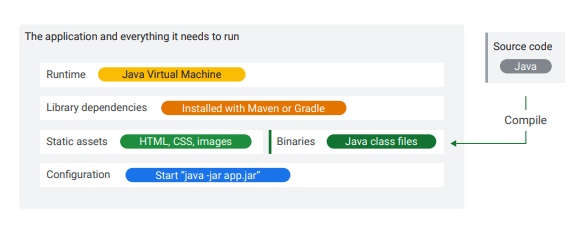

Go Application:

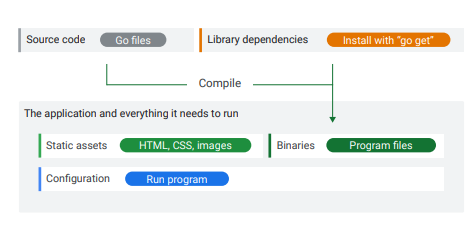

Go Application:

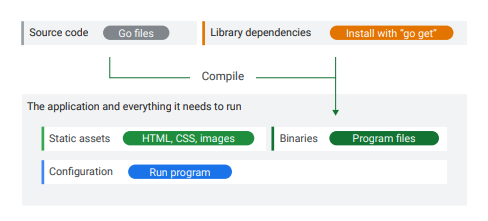

**Applications with System Dependencies:**

Some applications have dependencies on system tools that can’t be expressed as an application library dependency.

Some application examples include:
* A headless browser
* Tools that you might want to use to download or process files
* Additional system fonts
* ImageMagick (a suite of open source programs that can be used to convert
images from one format to another, and process them)

In development, you might also need additional tools to aid in debugging.

Types of files you might need to run your application and be included in the container image are:

* System Packages
* A runtime
* Library dependencies
* Source code
* Binaries
* Static assets
* Configuration


The command to be run when a container is started is called the entrypoint. Some
other important settings are:

* Environment variables, which are used to pass configuration settings to your
application.
* A working directory
* The user to run the program with.

It’s important to set the user. If not set, the root user (or system administrator) is used as the default, which is not a best practice for security reasons.

When you start the container, you can override the values of application arguments and environment variables.

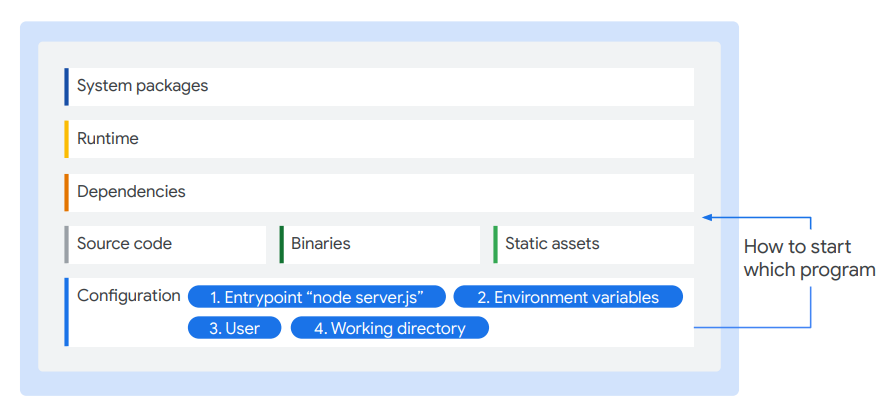

## Building Container Images with Docker

Build and Package your Application:

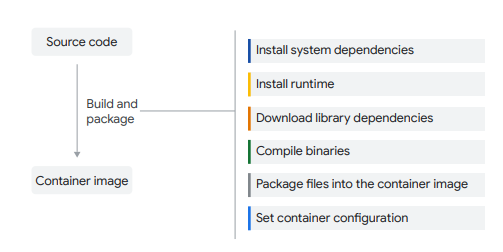

DockerBuild:

A set of features and tools in Docker to enable you to build and package your applications into container images

Takes your source code and a Dockerfile. You express the packaging of your source code usinga  set of instructions in the dockerfile

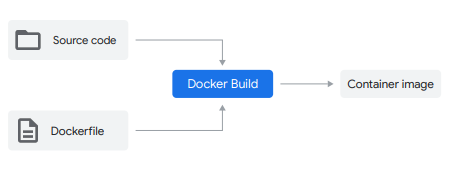

Sample Dockerfile:

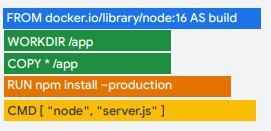

The instructions in the Dockerfile:
* Starts from a Node.js base image.
* Creates the application directory in the container file system.
* Copies the source code and other files to the container image.
* Installs the application dependencies excluding any devDependencies listed in
the package.json file.
* Sets configuration to run the application when it starts. (node server.js)

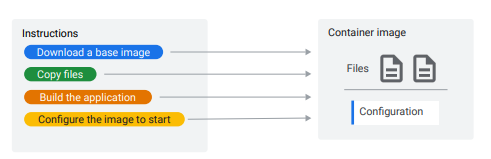

The general process is:
* Start with a base image, which contains tooling to build your application.
* Pull your source code and other required files into the container image.
* To build your application, run a program to update files in the image.
* Configure the image to start your application.


The FROM instruction downloads a base image from a registry and puts that on the
stage, to be modified by subsequent instructions

The COPY instruction pulls in source code. Docker has the concept of a “build
context,” which is the set of files in the source code directory.

The RUN instruction lets you run a program from the image, on the image. This
means:

 * The program file that you execute needs to be present in the container image.
 * The only files accessible to the program are those that exist on the container image

The instructions can include:

* ENTRYPOINT: points to the program file to start and run the container as an
executable.
* CMD: provides defaults for an executing container, that includes the command to run when the container is started. If the executable command is not specified, then the ENTRYPOINT instruction is required.
* ENV: is used to set environment variables.
* WORKDIR: sets the working directory of the program.
* USER: sets the user to use when starting the program.

[**Exercise 1:**](https://googlecoursera.qwiklabs.com/focuses/29483894?parent=lti_session)

Notes:

This exercise went through:

1. Creating a node.js application
2. Building a docker image
3. Running the image as a container
4. Stopping the container, then making a modification, then building a new image and running that. This new image includes a parameter you can create in the run command (A name that the application will call you).
5. Registering an artifact repository in Google Cloud.
6. Using Commands to upload the newer image to the repository
7. Deleting all the local images in the working environment
8. Pulling the just registered image into the local environment
9. Running it.

**BuildPacks:**

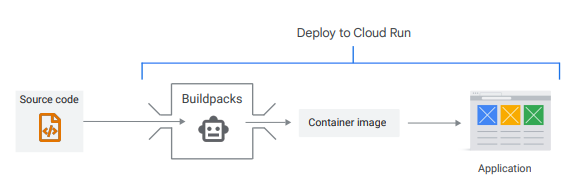

Buildpacks are a way to turn source code into a container image without writing a Dockerfile.  
Buildpacks provide developers with a convenient way to work with container images, without thinking about the complexities that come with building them.  
You can create your own Buildpacks, or use those provided by multiple vendors.
Buildpacks are built into Cloud Run to enable a source-based deployment workflow.

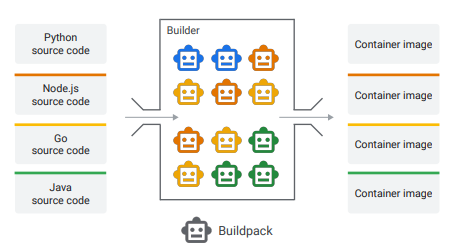

Buildpacks are distributed and executed in OCI images called builders. Each builder can have one or more buildpacks.

OCI stands for the Open Container Initiative, a Linux Foundation project that was
started in 2015 to design open standards for operating-system-level virtualization of
Linux containers.

A builder turns your source code into a container image. The buildpacks do the actual work to build and package the container image.

Builders can support source code written in multiple languages. In this example, the
builder can build and package a Python, Node.js, Go, and a Java application into a
container image.


If a builder starts to process a source directory, it executes two phases of a buildpack:
1. The detect phase  
The detect phase runs against your source code to determine if a buildpack is
applicable or not. Once a buildpack is detected to be applicable, the builder
proceeds to the build phase. If detection fails, the build phase for a specific
buildpack is skipped.  
For example, to pass the detect phase:
 * A Python buildpack may look for a requirements.txt or a setup.py file.
 * A Node buildpack may look for a package-lock.json file.
2. The build phase:  
The build phase runs against your source code to set up the build-time and
run-time environment, download dependencies and compile your source code
(if needed), and set appropriate entry point and startup scripts.  
For example:  
 * A Python buildpack may run pip install -r requirements.txt if it detected
 requirements.txt file.
 * A Node buildpack may run npm install if it detected a package-lock.json
file.

**Pack:**

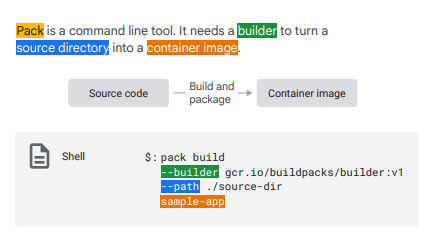

[**Exercise 2:**](https://googlecoursera.qwiklabs.com/focuses/29485109?parent=lti_session)

Note:

This exercise went through:

1. Downloading a python application's files and unzipping them
2. Building the application through Buildpack
3. Running the image with docker
4. Modifying the original application's code with an editor
5. Rebuiling the application through Buildpack
6. Running through Cloud Run

## **CI/CD for Containers**

**Skaffold**

Skaffold is a command line tool that orhcestrates CI/Cd of container-based Kubernetes applications

It is a google open source project that provides declaractive portable configuration with a pluggable architecture

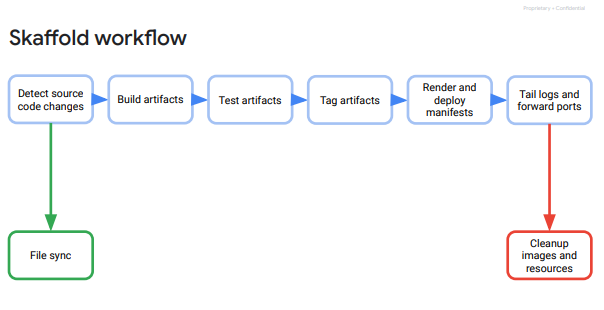

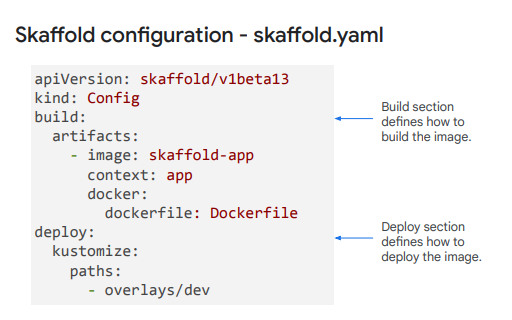

**Artifact Registry**

Artifact Registry is a service that is used to store and manage software artifacts in private repositories, including container images, and software packages.

It’s the recommended container registry for Google Cloud

**Cloud Build**

Cloud Build is a service that executes your builds on Google Cloud. With Cloud
Build, you can continuously build, test, and deploy your application using a
CI/CD pipeline.

Cloud Build can import source code from various repositories or cloud storage
spaces, execute a build to your specifications, and produce artifacts such as
Docker containers or Java archives.

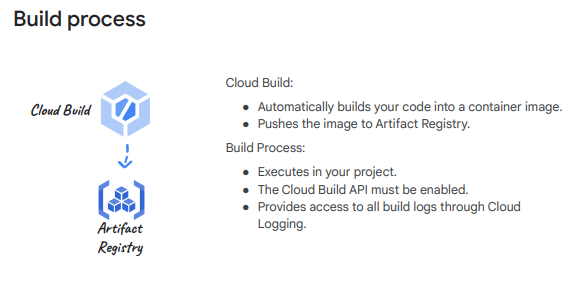

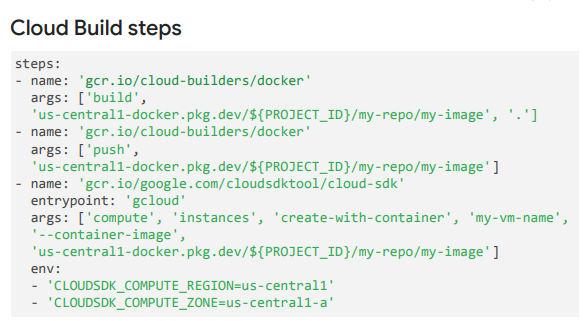

## **Container Best Practices**

Smaller size packages are better for production.

Distroless allows you to package only it's runtime and not build time dependencies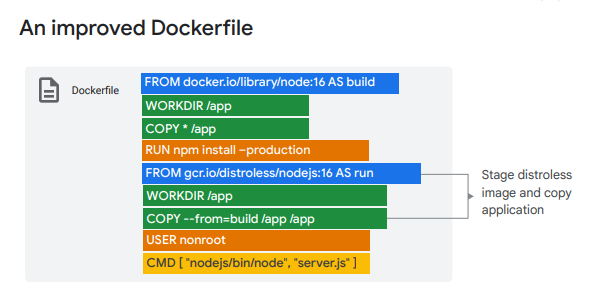

**Process and Signal Handling:**

Docker, Kubernetes, Cloud Run can only send signals to the process that has PID 1 inside a container you must launch the process with the CMD or ENTRYPOINT instruction in your Dockerfile.

##Cloud Run

* A managed compute platform
* Runs containers on Google’s
infrastructure
* Supports source-based deployment that
builds containers for you
* Build full-featured applications with other
Google Cloud services

**Cloud Run Developer Workflow**

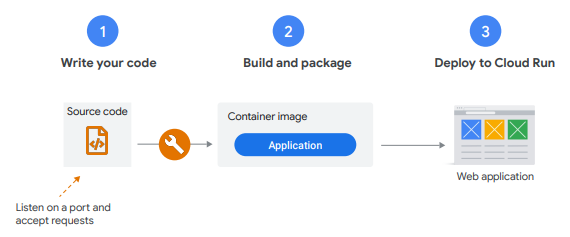

**Using BuildPacks**

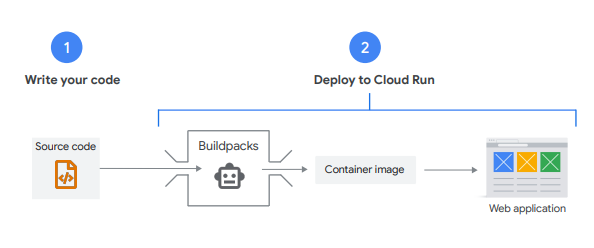

**Cloud Run Support for HTTPS**

Cloud Run will provision a valid TLS certificate and other configuration to support HTTP requests
It will handle incoming requests, decryption and forwarding to your application

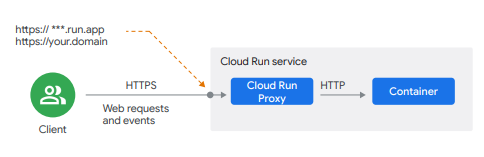

Application on Cloud Run must handle web requests

Cloud Run expects your container to listen on port number 8080 to handle web requests. You can change the port to another one if 8080 is already used by your application

You do not need to provide a HTTPS server.

[**Exercise 3:**](https://googlecoursera.qwiklabs.com/focuses/29503891?parent=lti_session)

Notes:

This exercise went through:

1. Downloading an already created app stored in Cloud Storage and unzipping it
2. Installing npm, a dependency
3. Running the app locally on port 8080 and testing it
4. Creating a docker repository through Artifact Registry
5. Setting up permissions to access the repository through the Cloud Shell terminal
6. Creating the container image configuration file
7. Using the configuration file to create a container, which also submits it to repository
8. Deploying the image to run as a constainer instance in Cloud Run
9. Testing the application through that is now facing the web

**Serving a REST API with Cloud Run**

Cloud Run is often used to provide a REST API, a website or application

The service can be connected to a database to persist the data

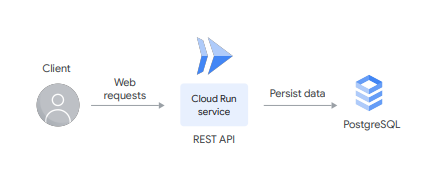

Example of an Ecommerce site on Cloud Run

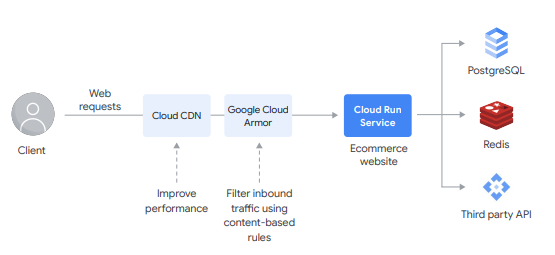

Microservicess on Cloud Run

This example shows three separate microservices running simultaneously that communicate with each other.

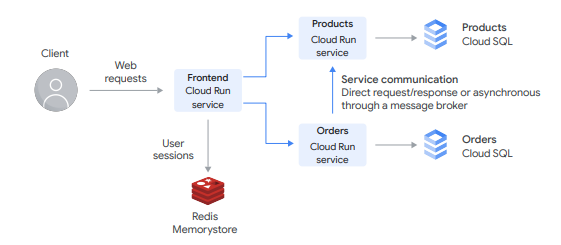

Event processing on Cloud Run

Cloud Run can integrate with other Google Cloud Services such as Cloud Storage, Cloud Build, Pub/Sub, Eventarc, and others

The example shows a medical scan that is placed in Cloud Storage, is converted into a modern format, pushed through pub/sub into one service that labels and watermarks, and another service that detects anomalies, before finally put into Cloud Storage again.

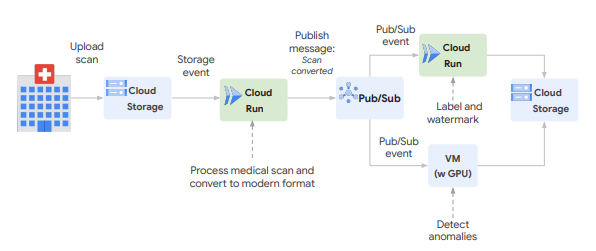

Service Revisions

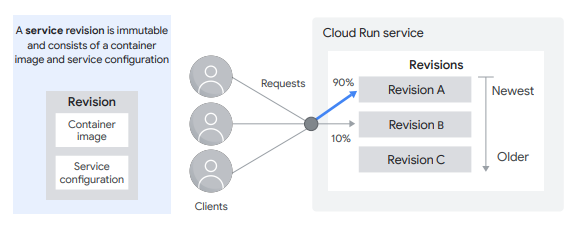

Automatic Scaling

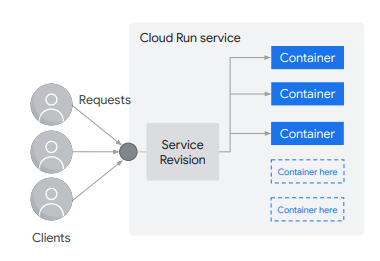

Regions and Zones

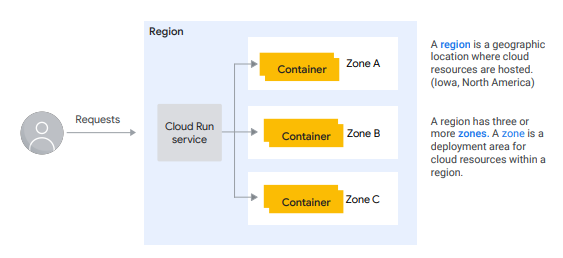

Global Load Balancing

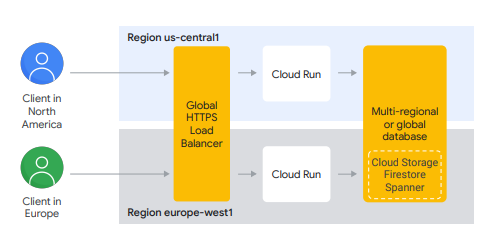

Considerations with Cloud Run

* If you deploy a service that scales up to many container instances, you will
incur costs for running those containers. To limit the number of instances
during autoscaling, you can set the maximum number of container instances
for your Cloud Run service.
* If your Cloud Run service scales up to many container instances in a short
period of time, your downstream systems might not be able to handle the
additional traffic load. You’ll need to understand the throughput capacity of
those downstream systems when configuring your Cloud Run service.
* As part of your application modernization strategy, you’ll need to create a
migration plan and use tools to migrate VM-based workloads into containers
that will run on Cloud Run or Google Kubernetes Engine

## **Kubernetes Engine**

Google Kubernetes Engine (GKE) is a fully managed Kubernetes service

Manages deploying, managing, and scaling your containerized applications on Google infrastructure

Advantages over self managing Kubernetes:

* Easy cluster creation and management.
* Load balancing.
* Automatic scaling.
* Automatic upgrades of your cluster node software.
* Automatic repair to maintain node health and availability.
* Logging and monitoring with Google Cloud’s operations suite for cluster
visibility.

The big disadvantage is obviously going to be cost

## Container Optimized OS

Besides Cloud Run and Kubernetes Engine, Google Cloud offers Container-Optimized OS

* Operating System Image for Compute Engine VMs to run Containerized applications
* Optimized for running Docker Containers
* Based on Chromium OS